In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
raw_data = pd.read_csv('data_set.csv')
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Dataset without feature engineering (Orignal_Dataset) for FLD 1

In [3]:
dataset1 = raw_data.drop('id', axis=1)
for column in dataset1.columns[1:]:
    dataset1[column] = dataset1[column].fillna(dataset1[column].mean())

dataset1.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)
dataset1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Dataset with features rearranged for FLD 2

In [4]:
diagnosis = dataset1.diagnosis
dataset2 = dataset1.drop('diagnosis', axis=1)
dataset2 = dataset2.sample(frac=1, axis=1)
dataset2.insert(0 ,'diagnosis', diagnosis)
dataset2

,diagnosis,radius_worst,concave_points_worst,smoothness_mean,symmetry_se,fractal_dimension_mean,concave_points_se,compactness_se,radius_mean,concavity_se,...,compactness_mean,area_worst,area_se,smoothness_se,concave_points_mean,concavity_worst,compactness_worst,perimeter_mean,concavity_mean,fractal_dimension_worst
0,1,25.380,0.2654,0.11840,0.03003,0.07871,0.01587,0.04904,17.99,0.05373,...,0.27760,2019.0,153.40,0.006399,0.14710,0.7119,0.66560,122.80,0.30010,0.11890
1,1,24.990,0.1860,0.08474,0.01389,0.05667,0.01340,0.01308,20.57,0.01860,...,0.07864,1956.0,74.08,0.005225,0.07017,0.2416,0.18660,132.90,0.08690,0.08902
2,1,23.570,0.2430,0.10960,0.02250,0.05999,0.02058,0.04006,19.69,0.03832,...,0.15990,1709.0,94.03,0.006150,0.12790,0.4504,0.42450,130.00,0.19740,0.08758
3,1,14.910,0.2575,0.14250,0.05963,0.09744,0.01867,0.07458,11.42,0.05661,...,0.28390,567.7,27.23,0.009110,0.10520,0.6869,0.86630,77.58,0.24140,0.17300
4,1,22.540,0.1625,0.10030,0.01756,0.05883,0.01885,0.02461,20.29,0.05688,...,0.13280,1575.0,94.44,0.011490,0.10430,0.4000,0.20500,135.10,0.19800,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,25.450,0.2216,0.11100,0.01114,0.05623,0.02454,0.02891,21.56,0.05198,...,0.11590,2027.0,158.70,0.010300,0.13890,0.4107,0.21130,142.00,0.24390,0.07115
565,1,23.690,0.1628,0.09780,0.01898,0.05533,0.01678,0.02423,20.13,0.03950,...,0.10340,1731.0,99.04,0.005769,0.09791,0.3215,0.19220,131.20,0.14400,0.06637
566,1,18.980,0.1418,0.08455,0.01318,0.05648,0.01557,0.03731,16.60,0.04730,...,0.10230,1124.0,48.55,0.005903,0.05302,0.3403,0.30940,108.30,0.09251,0.07820
567,1,25.740,0.2650,0.11780,0.02324,0.07016,0.01664,0.06158,20.60,0.07117,...,0.27700,1821.0,86.22,0.006522,0.15200,0.9387,0.86810,140.10,0.35140,0.12400


## Projection Vector 

In [5]:
def projection_vector(postive_set, negetive_set):
    m1 = positive_set.mean(axis=0)
    m2 = negetive_set.mean(axis=0)
    
    cov1 = np.zeros((30, 30))
    for x in positive_set:
        cov1 += np.outer(x-m1, x-m1)
    
    cov2 = np.zeros((30, 30))
    for x in negetive_set:
        cov2 += np.outer(x-m2, x-m2)
        
    sw = cov1 + cov2
    invsw = np.linalg.inv(sw)
    
    w = np.matmul(invsw, m2 - m1)
    return w

## Discriminating Point for Projected Points

In [6]:
def discriminant_point(positive_points, negetive_points, w):
    
    m1 = positive_points.mean()
    m2 = negetive_points.mean()
    s1 = positive_points.std()
    s2 = negetive_points.std()
    
    a = s2**2 - s1**2
    b = 2*(m2*(s1**2) - m1*(s2**2))
    c = (m1*s2)**2 - (m2*s1)**2 
    c -= (s1**2)*(s2**2)*(np.log(((len(positive_points)**2)*s2)/((len(negetive_points)**2)*s1)))
    return ((-1*b) + np.sqrt(b**2 - (4*a*c)))/(2*a)

## Evaluation

In [7]:
def func(x, c):
    if x<=c:
        return 1
    else:
        return 0
    
def evaluate_fld(testing_set, w, c):
    c_mat = np.zeros((2,2))
    for example in testing_set:
        x = example[1:]
        y = example[0]
        h = func(w.dot(x), c)
        if y==1 and h==1:
            c_mat[1][1]+=1
            
        elif y==1 and h==0:
            c_mat[1][0]+=1
            
        elif y==0 and h==0: 
            c_mat[0][0]+=1
            
        else:
            c_mat[0][1]+=1
            
    return c_mat

## Evaluating Metrics

In [8]:
def accuracy(c_mat):
    return (c_mat[0][0]+c_mat[1][1])/(c_mat[0][0] + c_mat[0][1] + c_mat[1][0] + c_mat[1][1])*100

def precision(c_mat):
    return (c_mat[0][0])/(c_mat[1][0] + c_mat[0][0])*100

def recall(c_mat):
    return (c_mat[1][1])/(c_mat[1][0] + c_mat[1][1])*100

## Spiltting Dataset into Training Data and Testing Data

In [9]:
training_data = dataset1.sample(frac=2/3)
testing_data = dataset1.drop(training_data.index)
training_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
144,0,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,...,11.95,20.72,77.79,441.2,0.1076,0.1223,0.09755,0.03413,0.2300,0.06769
91,1,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.074830,0.1717,...,16.43,25.84,107.50,830.9,0.1257,0.1997,0.28460,0.14760,0.2556,0.06828
457,0,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.020680,0.1619,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.13900,0.06005,0.2444,0.06788
138,1,14.95,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.086240,0.1957,...,18.55,21.43,121.40,971.4,0.1411,0.2164,0.33550,0.16670,0.3414,0.07147
563,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.65990,0.25420,0.2929,0.09873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,1,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.032630,0.1727,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
369,1,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.150100,0.1824,...,27.66,25.80,195.00,2227.0,0.1294,0.3885,0.47560,0.24320,0.2741,0.08574
507,0,11.06,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.042680,0.1954,...,11.69,20.74,76.08,411.1,0.1662,0.2031,0.12560,0.09514,0.2780,0.11680
250,1,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.131000,0.2205,...,25.58,27.00,165.30,2010.0,0.1211,0.3172,0.69910,0.21050,0.3126,0.07849


In [10]:
testing_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.880,27.66,153.20,1606.0,0.1442,0.25760,0.37840,0.19320,0.3063,0.08368
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.090,40.68,97.65,711.4,0.1853,1.05800,1.10500,0.22100,0.4366,0.20750
13,1,15.850,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.840,27.66,112.00,876.5,0.1131,0.19240,0.23220,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0,9.333,21.94,59.01,264.0,0.09240,0.05605,0.03996,0.01282,0.1692,...,9.845,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393
558,0,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.480,27.27,105.90,733.5,0.1026,0.31710,0.36620,0.11050,0.2258,0.08004
559,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.480,37.16,82.28,474.2,0.1298,0.25170,0.36300,0.09653,0.2112,0.08732
564,1,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.1410,0.21130,0.41070,0.22160,0.2060,0.07115


## Finding the Projection Vector for the given Training Data

In [11]:
training_set = training_data.to_numpy()
testing_set = testing_data.to_numpy()

positive_set = []
negetive_set = []
for example in training_set:
    if example[0] == 1:
        positive_set.append(example[1:])
    else:
        negetive_set.append(example[1:])

positive_set = np.array(positive_set)
negetive_set = np.array(negetive_set)
w = projection_vector(positive_set, negetive_set)
w

array([ 2.03320055e-03,  2.66935632e-04, -2.47657475e-06,  4.44463524e-07,
       -2.21638847e-02,  1.45674771e-01, -7.67772458e-02, -1.12553016e-01,
       -3.10832118e-02,  3.75572515e-01, -2.11174864e-03,  7.11949516e-04,
       -6.17408400e-04,  3.53989990e-06, -8.28151944e-01,  5.29752453e-02,
        1.39012465e-01, -3.16622218e-01, -2.92683768e-01,  4.93960980e-01,
       -9.32243487e-03, -6.95710021e-04,  1.44757266e-04,  4.32945023e-05,
       -1.09162239e-02,  6.21231524e-03, -1.23307111e-02, -5.67908710e-02,
        6.25884499e-03, -4.30550656e-01])

## Plotting the distribution of Positive and Negetive Classes after Projection

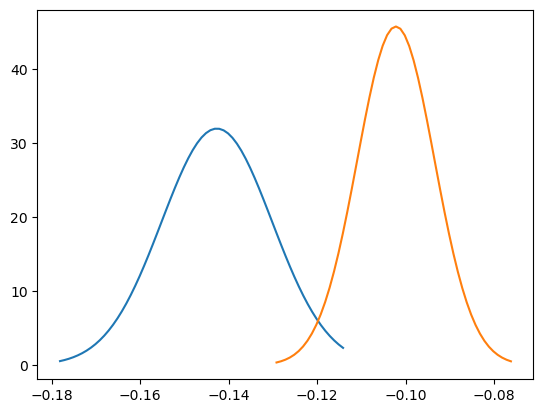

In [12]:
positive_points = np.array([w.dot(x) for x in positive_set])
negetive_points = np.array([w.dot(x) for x in negetive_set])

x = np.arange(positive_points.min(), positive_points.max(), 0.001)
plt.plot(x, norm.pdf(x, positive_points.mean(), positive_points.std()))

x = np.arange(negetive_points.min(), negetive_points.max(), 0.001)
plt.plot(x, norm.pdf(x, negetive_points.mean(), negetive_points.std()))

## Finding the Dicriminating Point for the Projected Points

In [22]:
c = discriminant_point(positive_points, negetive_points, w)
c

-0.12057151789697847

In [23]:
c_mat = evaluate_fld(testing_set, w, c)
print(c_mat)
print(f"Accuracy: {accuracy(c_mat)}")
print(f"Precision: {precision(c_mat)}")
print(f"Recall: {recall(c_mat)}")

[[123.   0.]
 [  9.  58.]]
Accuracy: 95.26315789473684
Precision: 93.18181818181817
Recall: 86.56716417910447


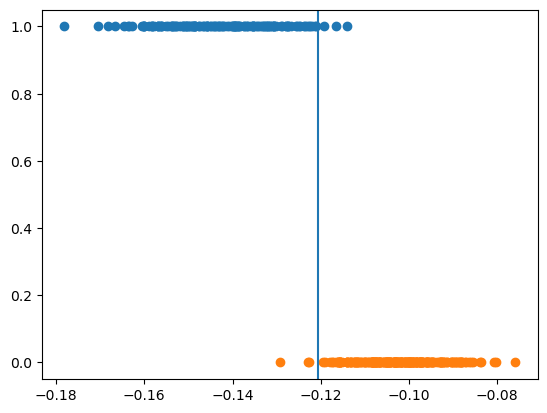

In [24]:
plt.plot(positive_points, np.ones(len(positive_points)), 'o')
plt.plot(negetive_points, np.zeros(len(negetive_points)), 'o')
plt.axvline(x = c)

## Fischer's Linear Disriminant 1

In [ ]:
accuracy_list = np.zeros(10)
precision_list = np.zeros(10)
recall_list = np.zeros(10)
w = np.zeros(31)
for i in range(10):
    
    training_data = dataset1.sample(frac=2/3)
    testing_data = dataset1.drop(training_data.index)
    training_set = training_data.to_numpy()
    testing_set = testing_data.to_numpy()
    
    positive_set = []
    negetive_set = []
    for example in training_set:
        if example[0] == 1:
            positive_set.append(example[1:])
        else:
            negetive_set.append(example[1:])
    
    positive_set = np.array(positive_set)
    negetive_set = np.array(negetive_set)
    w = projection_vector(positive_set, negetive_set)
    
    positive_points = np.array([w.dot(x) for x in positive_set])
    negetive_points = np.array([w.dot(x) for x in negetive_set])
    
    c = discriminant_point(positive_points, negetive_points, w)
    c_mat = evaluate_fld(testing_set, w, c)
    
    print(f"Model No.{i+1}")
    print(f"Confusion Matrix:\n{c_mat}")
    print(f"Accuracy = {accuracy(c_mat)}")
    print(f"Precision = {precision(c_mat)}")
    print(f"Recall = {recall(c_mat)}")
    
    accuracy_list[i] =  accuracy(c_mat)
    precision_list[i] = precision(c_mat)
    recall_list[i] =  recall(c_mat)
    print("\n")
    
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

## Fischer's Linear Discriminant 2

In [ ]:
accuracy_list = np.zeros(10)
precision_list = np.zeros(10)
recall_list = np.zeros(10)
w = np.zeros(31)
for i in range(10):
    
    training_data = dataset2.sample(frac=2/3)
    testing_data = dataset2.drop(training_data.index)
    training_set = training_data.to_numpy()
    testing_set = testing_data.to_numpy()
    
    positive_set = []
    negetive_set = []
    for example in training_set:
        if example[0] == 1:
            positive_set.append(example[1:])
        else:
            negetive_set.append(example[1:])
    
    positive_set = np.array(positive_set)
    negetive_set = np.array(negetive_set)
    w = projection_vector(positive_set, negetive_set)
    
    positive_points = np.array([w.dot(x) for x in positive_set])
    negetive_points = np.array([w.dot(x) for x in negetive_set])
    
    c = discriminant_point(positive_points, negetive_points, w)
    c_mat = evaluate_fld(testing_set, w, c)
    
    print(f"Model No.{i+1}")
    print(f"Confusion Matrix:\n{c_mat}")
    print(f"Accuracy = {accuracy(c_mat)}")
    print(f"Precision = {precision(c_mat)}")
    print(f"Recall = {recall(c_mat)}")
    
    accuracy_list[i] =  accuracy(c_mat)
    precision_list[i] = precision(c_mat)
    recall_list[i] =  recall(c_mat)
    print("\n")
    
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")